# ✈️ Australian Domestic Flight Reliability Analysis
### *Uncovering Cancellation Trends & Airline Performance*

---

###  Executive Summary
This project analyzes historical flight data for Australia's top 5 domestic routes to identify operational bottlenecks and reliability patterns. By examining cancellation rates across different airlines, routes, and seasons, this analysis aims to answer key business questions regarding flight stability.

**Key Objectives:**
* Identify **seasonal trends** that impact flight cancellations (Winter vs. Summer).
* Benchmark **airline performance** to determine the most reliable carriers.
* Analyze the relationship between **route distance** and cancellation probability.

---

###  Data Dictionary
The dataset consists of monthly aggregated flight data for major Australian routes.
* **Route**: The flight path (Departure City ➝ Arrival City).
* **Airline**: The operating carrier (e.g., Qantas, Jetstar, Virgin Australia).
* **Sectors_Scheduled**: Total number of flights planned for the month.
* **Sectors_Flown**: Total number of flights actually flown.
* **Cancellations**: Total number of cancelled flights.
* **Month_Num**: Month of the year (1 = January, 12 = December).

---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (10, 6) 

df = pd.read_csv("otp_top5_routes.csv")
df.head()

,Route,Departing_Port,Arriving_Port,Airline,Month,Sectors_Scheduled,Sectors_Flown,Cancellations,Departures_On_Time,Arrivals_On_Time,Departures_Delayed,Arrivals_Delayed,Year,Month_Num
0,Brisbane-Melbourne,Brisbane,Melbourne,Qantas,2004-01-01,496.0,492,4.0,410.0,427.0,82.0,65.0,2004,1
1,Brisbane-Sydney,Brisbane,Sydney,Qantas,2004-01-01,683.0,677,6.0,576.0,595.0,101.0,82.0,2004,1
2,Melbourne-Sydney,Melbourne,Sydney,Qantas,2004-01-01,821.0,799,22.0,723.0,706.0,76.0,93.0,2004,1
3,Sydney-Brisbane,Sydney,Brisbane,Qantas,2004-01-01,686.0,682,4.0,614.0,599.0,68.0,83.0,2004,1
4,Sydney-Melbourne,Sydney,Melbourne,Qantas,2004-01-01,800.0,785,15.0,683.0,708.0,102.0,77.0,2004,1


---------

###  Feature Engineering: Cancellation Rates
Calculating the ratio of cancelled flights to scheduled flights to allow for fair comparison.

In [3]:
df["Cancellation_Rates"] = df["Cancellations"] / df["Sectors_Scheduled"]

df[["Airline", "Cancellation_Rates"]].head()

,Airline,Cancellation_Rates
0,Qantas,0.008065
1,Qantas,0.008785
2,Qantas,0.026797
3,Qantas,0.005831
4,Qantas,0.018750


### Histograms



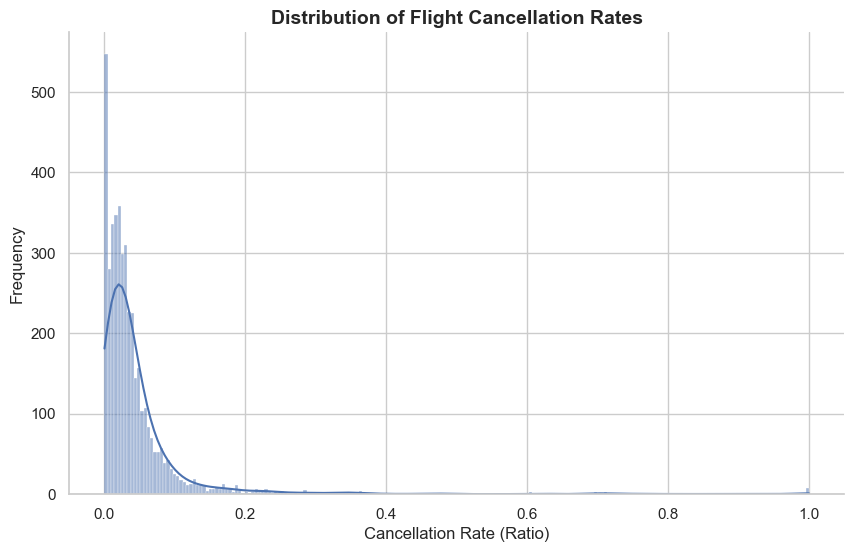

In [4]:
plt.figure(figsize=(10, 6)) 

sns.histplot(data=df, x="Cancellation_Rates", kde=True, color="#4c72b0") 

plt.title("Distribution of Flight Cancellation Rates", fontsize=14, weight='bold')
plt.xlabel("Cancellation Rate (Ratio)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)


sns.despine()
plt.show()

**💡 Insight:**
The distribution of cancellation rates is **highly right-skewed**. This indicates that flight cancellations are generally rare events, with the vast majority of flights having a cancellation rate near 0%. However, there is a "long tail" of outliers representing specific periods of major disruption.


------

###  Outlier Analysis: Overall Cancellation Spread
Using a boxplot to visualize the central tendency and detect extreme anomalies in the daily flight operations.

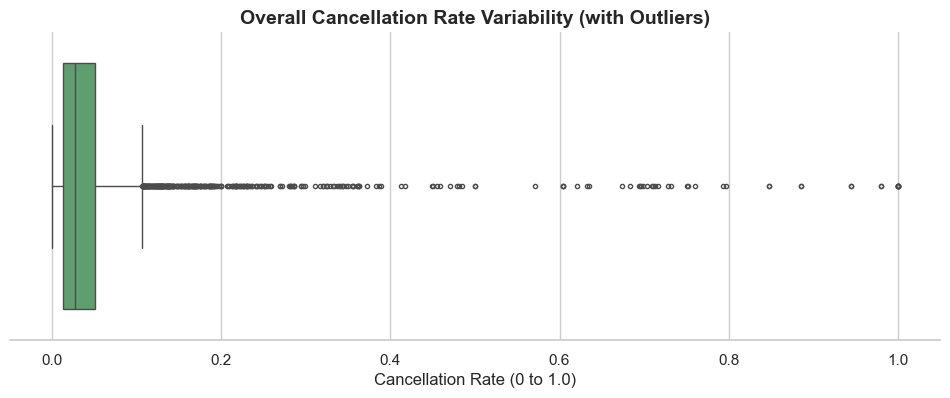

In [5]:
plt.figure(figsize=(12, 4)) 

sns.boxplot(data=df, x="Cancellation_Rates", color="#55a868", fliersize=3) 

plt.title("Overall Cancellation Rate Variability (with Outliers)", fontsize=14, weight='bold')
plt.xlabel("Cancellation Rate (0 to 1.0)", fontsize=12)

sns.despine(left=True) 
plt.show()

**💡 Key Observation:**
The **compact box** on the left shows that for the vast majority of flights, operations are smooth with near-zero cancellations. However, the heavy presence of **outliers** extending to **1.0 (100%)** highlights that when disruptions occur, they can be severe (likely due to major weather events or strikes).

---

### Airline Performance Benchmarking
Comparing the reliability of different carriers. We analyze the spread of cancellation rates to identify which airlines offer the most consistent service.

C:\Users\asus\AppData\Local\Temp\ipykernel_31536\653366905.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


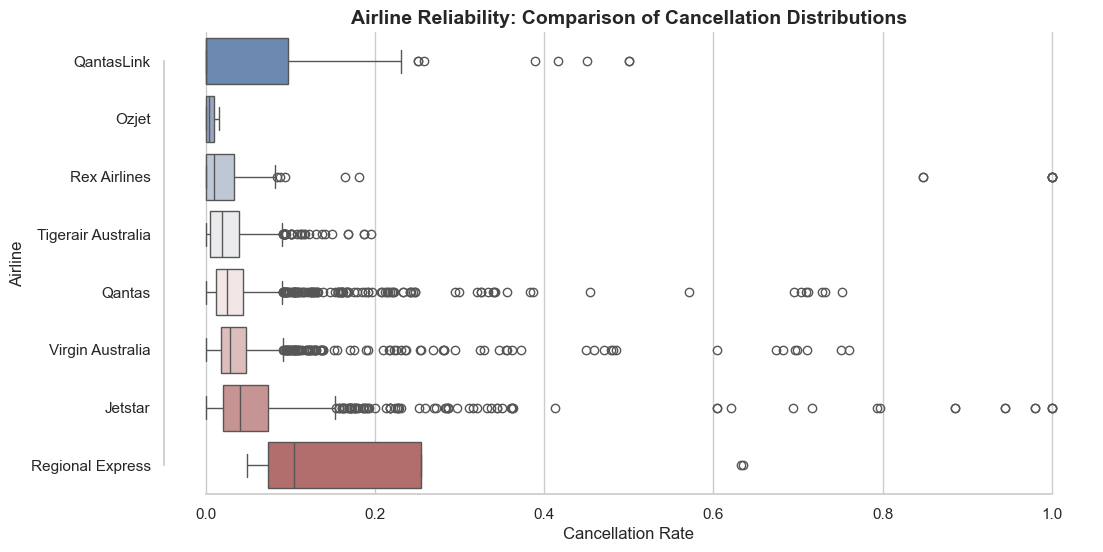

In [6]:
airline_order = df.groupby('Airline')['Cancellation_Rates'].median().sort_values().index


plt.figure(figsize=(12, 6)) 

sns.boxplot(
    data=df,
    x="Cancellation_Rates",
    y="Airline",       
    order=airline_order, 
    palette="vlag"     
)

plt.title("Airline Reliability: Comparison of Cancellation Distributions", fontsize=14, weight='bold')
plt.xlabel("Cancellation Rate", fontsize=12)
plt.ylabel("Airline", fontsize=12)

sns.despine(trim=True)
plt.show()

**💡 Performance Insights:**
* **Qantas & Virgin Australia** demonstrate the highest reliability, with narrow boxplots indicating consistent on-time performance and very low cancellation rates.
* **Jetstar & Tigerair** show a wider spread (longer boxes), meaning their service is more volatile and prone to irregular disruptions.
* **Regional Express** exhibits the highest variability, suggesting it might be the riskiest option for time-sensitive travelers.

### 🔥 Seasonal Analysis: Heatmap of Route Disruptions
Here, we pivot the data to investigate **seasonality**. By cross-referencing routes with months, we can pinpoint exactly *when* and *where* the highest failure rates occur.

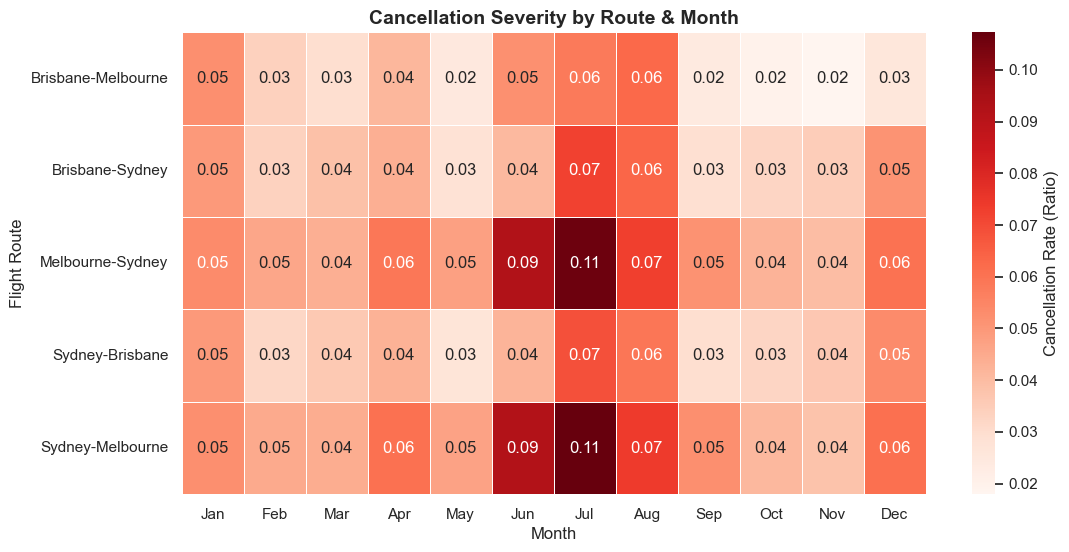

In [7]:
heatmap_data = df.pivot_table(
    index="Route",
    columns="Month_Num",
    values="Cancellation_Rates",
    aggfunc="mean"
)

plt.figure(figsize=(12, 6))

sns.heatmap(
    heatmap_data,
    annot=True,     
    fmt=".2f",        
    cmap="Reds",      
    linewidths=0.5,   
    cbar_kws={'label': 'Cancellation Rate (Ratio)'}
)


plt.title("Cancellation Severity by Route & Month", fontsize=14, weight='bold')
plt.xlabel("Month", fontsize=12)
plt.ylabel("Flight Route", fontsize=12)

plt.xticks(
    ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5],
    labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    rotation=0
)

plt.show()

**💡 Critical Finding:**
* **The Winter Effect:** There is a distinct "Red Zone" in **June and July** (Australian Winter). Cancellation rates spike significantly during these months, likely due to adverse weather conditions (fog/storms).
* **High-Risk Routes:** The **Sydney ↔ Melbourne** corridor is the most heavily impacted, with cancellation rates reaching **~11%** in June. This suggests that operational planning needs to account for higher buffers during the winter season on this specific route.

-----

---
###  Final Conclusion & Strategic Recommendations

Based on the data analysis of Australia's top domestic routes, we derive the following actionable insights:

**1. Seasonal Operations Planning:**
* **The "Winter Crunch":** Airlines and passengers must anticipate major disruptions in **June and July**.
* **Recommendation:** For critical business travel during Australian winter, avoid tightly scheduled connections, especially on the Sydney-Melbourne route.

**2. Carrier Selection Strategy:**
* **Reliability First:** **Qantas** and **Virgin Australia** are the safest bets for time-sensitive travel, demonstrating consistent low-cancellation performance.
* **Budget vs. Risk:** **Jetstar** and **Tigerair** entail higher operational risks. They should be chosen primarily when cost savings outweigh the risk of cancellation.

**3. Route-Specific Caution:**
* The **Sydney ↔ Melbourne** corridor is the most volatile. Operational teams should allocate higher reserve capacity (standby crews/aircraft) on this route during peak winter months.